<a href="https://colab.research.google.com/github/EgiNHardo/Proyecto0/blob/main/PUZZLEBRAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
pip install matplotlib moviepy networkx pillow


  if event.key is 'enter':



Moviepy - Building video rompecabezas_red_neuronal.mp4.
Moviepy - Writing video rompecabezas_red_neuronal.mp4



Moviepy - Done !
Moviepy - video ready rompecabezas_red_neuronal.mp4


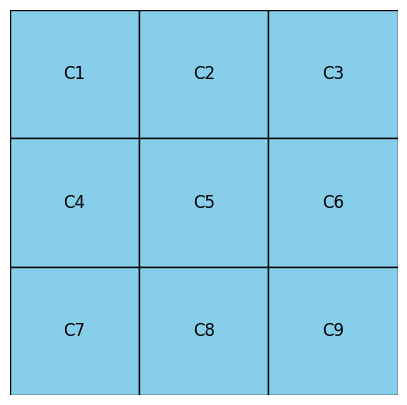

In [15]:
import os
import matplotlib.pyplot as plt
import networkx as nx
from moviepy.editor import ImageSequenceClip

# Crear carpetas para las imágenes
os.makedirs("frames_puzzle", exist_ok=True)
os.makedirs("frames_red", exist_ok=True)

# -------- 1. Rompecabezas uniéndose (10 segundos = 10 fps * 10 = 100 frames) --------
def generar_rompecabezas():
    piezas = 9
    lado = 3
    fig, ax = plt.subplots(figsize=(5, 5))

    for i in range(100):  # 100 frames
        ax.clear()
        ax.set_xlim(0, lado)
        ax.set_ylim(0, lado)
        ax.axis('off')

        for p in range(min(i // 10 + 1, piezas)):
            fila = p // lado
            col = p % lado
            ax.add_patch(plt.Rectangle((col, lado - fila - 1), 1, 1, fill=True, color="skyblue", ec='black'))
            ax.text(col + 0.5, lado - fila - 0.5, f'C{p+1}', ha='center', va='center', fontsize=12)

        plt.savefig(f"frames_puzzle/frame_{i:03d}.png", bbox_inches='tight')

# -------- 2. Red neuronal conectándose (otros 100 frames) --------
def generar_red_neuronal():
    G = nx.erdos_renyi_graph(15, 0.1)
    pos = nx.spring_layout(G, seed=42)

    for i in range(100):
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.axis('off')

        # Mostrar nodos
        nx.draw_networkx_nodes(G, pos, ax=ax, node_size=300, node_color="lightgreen")

        # Mostrar progresivamente las aristas
        edges_to_draw = list(G.edges())[:i // 2]
        nx.draw_networkx_edges(G, pos, edgelist=edges_to_draw, ax=ax, width=2, edge_color="gray")

        # Opcional: etiquetas
        nx.draw_networkx_labels(G, pos, ax=ax, font_size=10)

        plt.savefig(f"frames_red/frame_{i:03d}.png", bbox_inches='tight')
        plt.close()

# -------- 3. Unir ambas partes en video --------
def crear_video():
    frames_puzzle = [f"frames_puzzle/frame_{i:03d}.png" for i in range(100)]
    frames_red = [f"frames_red/frame_{i:03d}.png" for i in range(100)]
    frames_total = frames_puzzle + frames_red

    clip = ImageSequenceClip(frames_total, fps=10)
    clip.write_videofile("rompecabezas_red_neuronal.mp4", codec='libx264')

# -------- Ejecutar todo --------
generar_rompecabezas()
generar_red_neuronal()
crear_video()


In [16]:
pip install matplotlib networkx moviepy


In [17]:
import os
import matplotlib.pyplot as plt
import networkx as nx
from moviepy.editor import ImageSequenceClip
import shutil

# Configuración
frames_dir = "frames_red_neuronal"
video_filename = "red_neuronal_animada.mp4"
fps = 10
duracion = 10  # segundos
total_frames = fps * duracion

# Preparar carpeta limpia
if os.path.exists(frames_dir):
    shutil.rmtree(frames_dir)
os.makedirs(frames_dir)

# Crear grafo (red) de ideas
nodos = 20
probabilidad_conexion = 0.2
G = nx.erdos_renyi_graph(nodos, probabilidad_conexion, seed=42)
pos = nx.spring_layout(G, seed=42)  # Layout estático para consistencia

# Crear frames animando la red
for i in range(total_frames):
    plt.figure(figsize=(6, 6))
    plt.axis('off')

    # Mostrar todos los nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    # Animar las conexiones poco a poco
    num_edges = int(len(G.edges) * (i / total_frames))
    edges_to_draw = list(G.edges())[:num_edges]
    nx.draw_networkx_edges(G, pos, edgelist=edges_to_draw, width=2, edge_color='gray')

    # Etiquetas opcionales (puedes quitar esto)
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Guardar frame
    frame_path = os.path.join(frames_dir, f"frame_{i:03d}.png")
    plt.savefig(frame_path, bbox_inches='tight')
    plt.close()

# Crear video
clip = ImageSequenceClip([os.path.join(frames_dir, f"frame_{i:03d}.png") for i in range(total_frames)], fps=fps)
clip.write_videofile(video_filename, codec='libx264')

print(f"\n✅ Video generado exitosamente: {video_filename}")


Moviepy - Building video red_neuronal_animada.mp4.
Moviepy - Writing video red_neuronal_animada.mp4



Moviepy - Done !
Moviepy - video ready red_neuronal_animada.mp4

✅ Video generado exitosamente: red_neuronal_animada.mp4


In [18]:
video_filename = "red_neuronal_animada.mp4"


In [21]:
from google.colab import files
files.download(video_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🧠 CÓDIGO CORREGIDO Y MEJORADO

In [22]:
import os
import matplotlib.pyplot as plt
import networkx as nx
from moviepy.editor import ImageSequenceClip
import shutil

# Configuración
frames_dir = "frames_red_neuronal"
video_filename = "red_neuronal_animada.mp4"
fps = 10
duracion = 10  # segundos
total_frames = fps * duracion

# Preparar carpeta limpia
if os.path.exists(frames_dir):
    shutil.rmtree(frames_dir)
os.makedirs(frames_dir)

# -------------------- 1. Crear grafo asegurando conectividad --------------------
# Grafo con más nodos y mayor densidad
nodos = 40
probabilidad_conexion = 0.25

# Crear grafo hasta que esté conectado completamente
while True:
    G = nx.erdos_renyi_graph(nodos, probabilidad_conexion)
    if nx.is_connected(G):
        break

# Layout compacto y fijo
pos = nx.spring_layout(G, seed=42, k=0.15)  # k más pequeño = nodos más juntos

# -------------------- 2. Crear los frames de la animación --------------------
for i in range(total_frames):
    fig, ax = plt.subplots(figsize=(6, 6), facecolor='black')
    ax.set_facecolor("black")
    plt.axis('off')

    # Dibujar todos los nodos en azul claro
    nx.draw_networkx_nodes(G, pos, ax=ax, node_color='deepskyblue', node_size=250)

    # Dibujar progresivamente más conexiones
    edges_to_draw = list(G.edges())[:int(len(G.edges()) * (i / total_frames))]
    nx.draw_networkx_edges(G, pos, edgelist=edges_to_draw, ax=ax, width=1.8, edge_color='white')

    # (Opcional) Mostrar etiquetas - comentado para estética limpia
    # nx.draw_networkx_labels(G, pos, ax=ax, font_color="white", font_size=8)

    # Guardar imagen
    frame_path = os.path.join(frames_dir, f"frame_{i:03d}.png")
    plt.savefig(frame_path, bbox_inches='tight', facecolor='black')
    plt.close()

# -------------------- 3. Crear el video --------------------
clip = ImageSequenceClip([os.path.join(frames_dir, f"frame_{i:03d}.png") for i in range(total_frames)], fps=fps)
clip.write_videofile(video_filename, codec='libx264')

print(f"✅ Video final generado correctamente: {video_filename}")


Moviepy - Building video red_neuronal_animada.mp4.
Moviepy - Writing video red_neuronal_animada.mp4



Moviepy - Done !
Moviepy - video ready red_neuronal_animada.mp4
✅ Video final generado correctamente: red_neuronal_animada.mp4


In [23]:
video_filename = "red_neuronal_animada.mp4"


In [24]:
from google.colab import files
files.download(video_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🧪 ¿PRUEBAS?

Puedes revisar la conectividad del grafo con:

In [27]:
print("¿La red está completamente conectada?:", nx.is_connected(G))


¿La red está completamente conectada?: True


Y si quieres asegurar que todos los nodos estén conectados a al menos 1 vecino:

In [28]:
aislados = list(nx.isolates(G))
print("Nodos aislados:", aislados)


Nodos aislados: []
